In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3173 - accuracy: 0.9065
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1540 - accuracy: 0.9540
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1196 - accuracy: 0.9650
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0991 - accuracy: 0.9703
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0856 - accuracy: 0.9744
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0771 - accuracy: 0.9768
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0727 - accuracy: 0.9788
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0665 - accuracy: 0.9808
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0612 - accuracy: 0.9822
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0578 - accura

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9817


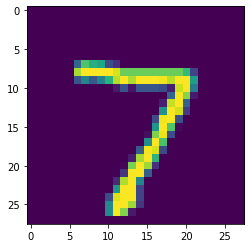

Prob that's  0  is:  0 %
Prob that's  1  is:  0 %
Prob that's  2  is:  0 %
Prob that's  3  is:  0 %
Prob that's  4  is:  0 %
Prob that's  5  is:  0 %
Prob that's  6  is:  0 %
Prob that's  7  is:  100 %
Prob that's  8  is:  0 %
Prob that's  9  is:  0 %


In [100]:
index = 0

plt.imshow(test_images[index].reshape(28,28))

plt.show()

predictions = network.predict(test_images[index].reshape(1,28*28))

for i in range(10):
    print("Prob that's ",i," is: ",int(round(predictions[0][i],2)*100),"%") 


It's hard to preprare correct image for this model, because a lot of features have a meaning. The best image for this model you can receive using gray color and brush and the smallest brush size in Paint program.

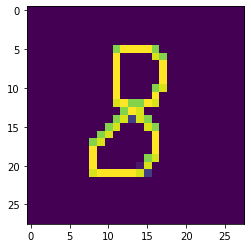

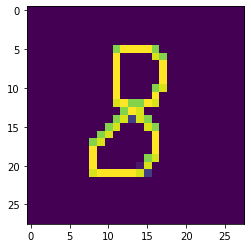

Prob that's  0  is:  0 %
Prob that's  1  is:  1 %
Prob that's  2  is:  14 %
Prob that's  3  is:  5 %
Prob that's  4  is:  10 %
Prob that's  5  is:  2 %
Prob that's  6  is:  0 %
Prob that's  7  is:  0 %
Prob that's  8  is:  64 %
Prob that's  9  is:  0 %


In [96]:
img = plt.imread('img/img.png')

img.astype('float32')
img = (img[:,:,0]+img[:,:,1]+img[:,:,2])/3


plt.imshow(img)
plt.show()

img = img.reshape(-1,28*28)

plt.imshow(img.reshape(28,28))
plt.show()

predictions = network.predict(img)
for i in range(10):
    print("Prob that's ",i," is: ",int(round(predictions[0][i],2)*100),"%") 